 #  Сравнение портфелей

In [56]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

import matplotlib.pyplot as plt
from pandas_datareader import data

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Обзор портфелей (сравнение)

Сравниваем по средней (любой вариации: взвешенные и тд) доходности портфеля в день

In [57]:
whale_returns_csv = Path("whale_returns.csv")
whalereturns_df = pd.read_csv(whale_returns_csv)
whalereturns_df.set_index(pd.to_datetime(whalereturns_df['Date'], infer_datetime_format=True), inplace=True)
whalereturns_df = whalereturns_df.drop(columns=["Date"])

# удалю пустоты
whalereturns_df = whalereturns_df.dropna()
whalereturns_df.isnull().sum()

whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Добавляем индекс для сравнения

S&P 500 в качестве примера, так как многие из этих фондов имеют в своем составе именно S&P500 

In [58]:
sp500_history_csv = Path("sp500_history.csv")
sp500history_df = pd.read_csv(sp500_history_csv)
sp500history_df.set_index(pd.to_datetime(sp500history_df['Date'], infer_datetime_format=True), inplace=True)

# Фикс типов данных в общий вид
sp500history_df['Close'] = sp500history_df['Close'].str.replace('$', '')
sp500history_df['Close'].dtypes
sp500history_df['Close']= sp500history_df['Close'].astype('float')
sp500history_df['Close'].dtypes

# считаем дневное изменение
sp500_return = sp500history_df['Close'].pct_change()
sp500_return = sp500_return.dropna().copy()

# из Series в DataFrame
sp500_returndf=sp500_return.to_frame(name=None)
sp500_returndf.rename(columns = {'Close':'S&P 500'}, inplace = True)
sp500_returndf.head()



,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Собираем в единый набор

In [59]:
combined_df = pd.concat([whalereturns_df,sp500_returndf], axis='columns', join='inner')
combined_df.head(5)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254


---

## Анализ портфелей

### Лучшей чем S&P500 по днейвной доходности


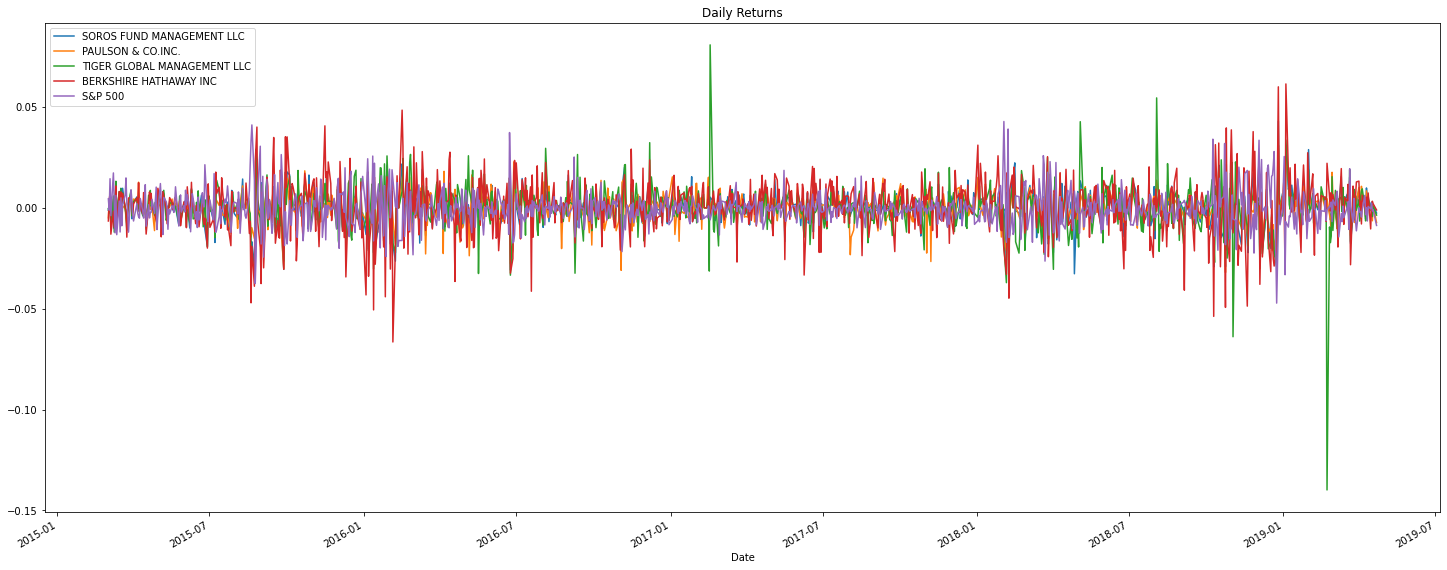

In [60]:
# ?
combined_df_plot = combined_df.plot(figsize=(25,10),legend=True,title="Daily Returns")

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

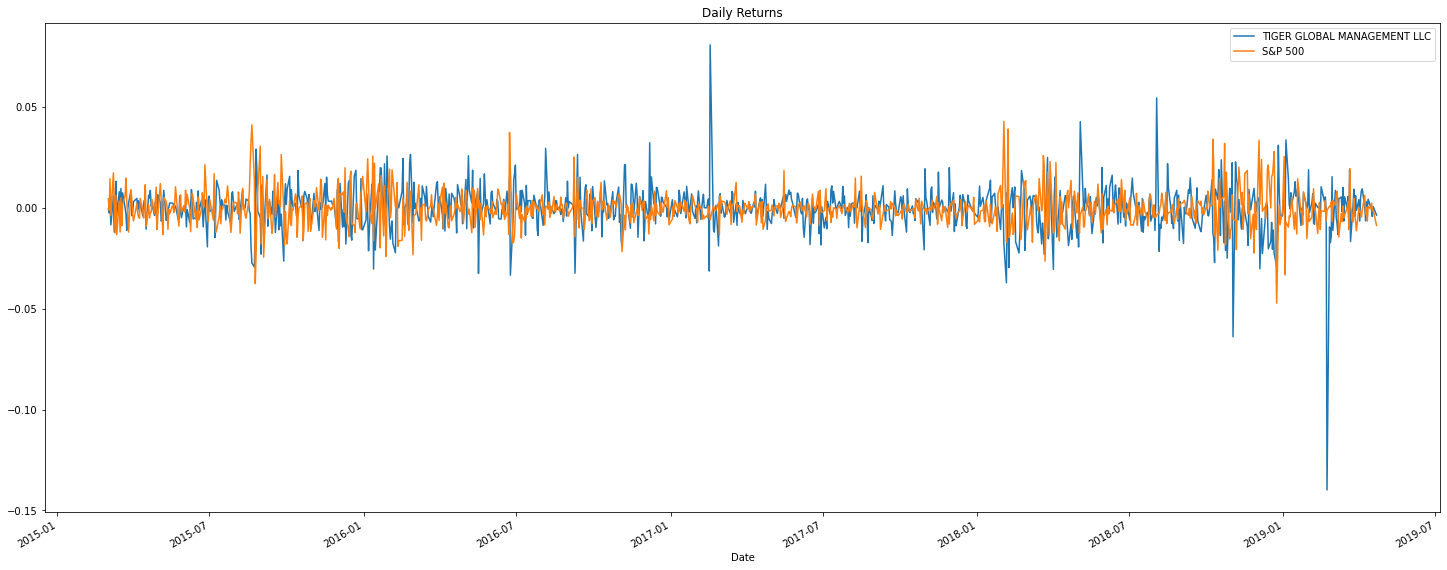

In [61]:
# корреляция - не означает, что есть взаимосвязь !
# но как анализировать данный результат? (многие рисуют в своем анализе, но он не информативен)
combined_df[['TIGER GLOBAL MANAGEMENT LLC', 'S&P 500']].plot(figsize=(25,10),legend=True,title="Daily Returns")

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

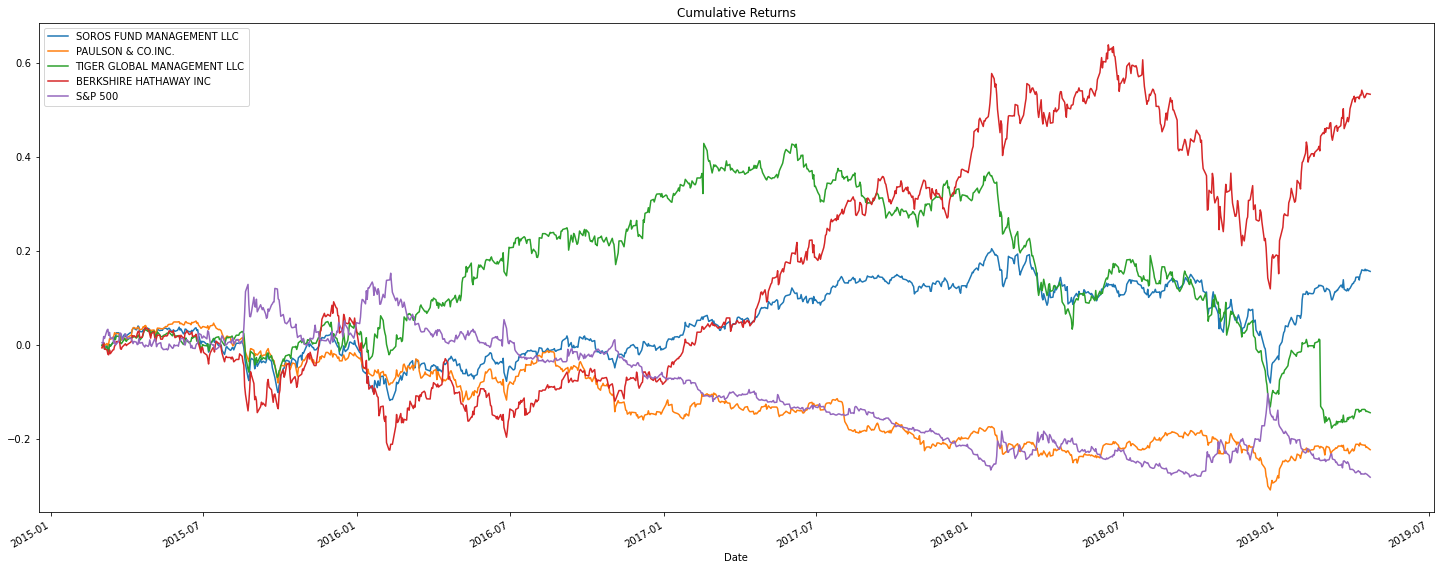

In [62]:
# Кумулятивная визуализация - покажет тренд и действительно значим для результата
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(25,10),legend=True,title="Cumulative Returns")

### Анализ рисков

4 основных метода оценки рисков:

- "усики" покажут "нестабильность портфеля
- STD - подтвердит первый результат
- сравить с базовым портфелем, чтобы подтвердить п1. и п.2
- узнать годовые значения

<AxesSubplot:title={'center':'S&P 500'}>

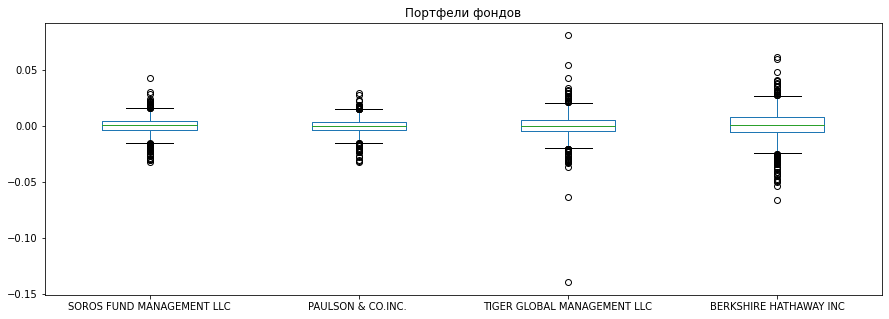

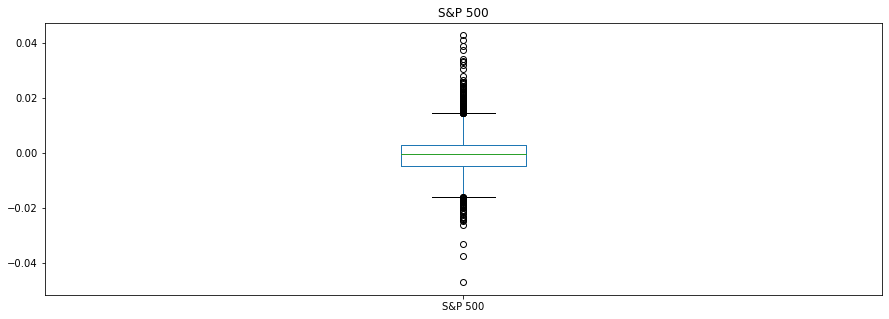

In [63]:
# Box plot - те самые усатые ящики
whalereturns_df.plot.box(figsize=(15,5),legend=True,title="Портфели фондов")
sp500_returndf.plot.box(figsize=(15,5),legend=True,title="S&P 500")

<AxesSubplot:>

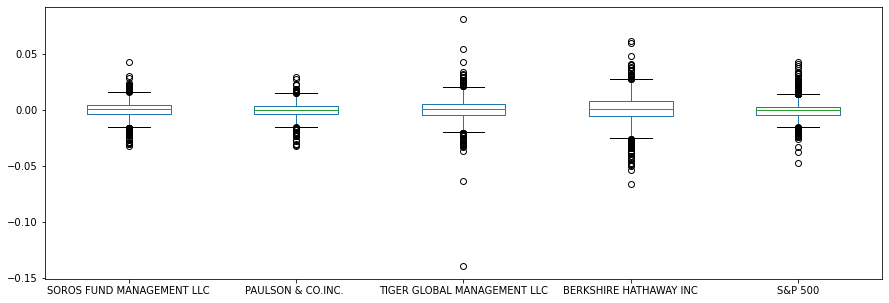

In [64]:
# все в одном
combined_df.plot.box(figsize=(15,5),legend=True)

In [65]:
# дневной STD
# какой портфель наиболее рискованный
whalereturns_std = whalereturns_df.std()
sp500_returndf_std= sp500_returndf.std()

print(round(((whalereturns_std - sp500_returndf_std.values[0])/ sp500_returndf_std.values[0]) * 100), 2)


SOROS FUND MANAGEMENT LLC      -4.0
PAULSON & CO.INC.             -14.0
TIGER GLOBAL MANAGEMENT LLC    33.0
BERKSHIRE HATHAWAY INC         58.0
dtype: float64 2


In [69]:
whalereturns_std, sp500_returndf_std.values[0]

(SOROS FUND MANAGEMENT LLC      0.007842
 PAULSON & CO.INC.              0.006977
 TIGER GLOBAL MANAGEMENT LLC    0.010824
 BERKSHIRE HATHAWAY INC         0.012831
 dtype: float64,
 0.008134642617809523)

In [70]:
# Вариант через таблицу
combined_std=pd.concat([whalereturns_std, sp500_returndf_std], axis='rows', join="inner")
combined_std = combined_std.sort_values(ascending=False)
pd.DataFrame(combined_std, columns = ['РИСК'])


,РИСК
BERKSHIRE HATHAWAY INC,0.012831
TIGER GLOBAL MANAGEMENT LLC,0.010824
S&P 500,0.008135
SOROS FUND MANAGEMENT LLC,0.007842
PAULSON & CO.INC.,0.006977


In [71]:
# Годовое отклонение
an_whalereturns_std = whalereturns_std * np.sqrt(252)
an_sp500_returndf_std = sp500_returndf_std * np.sqrt(252)

an_combined_std=pd.concat([an_whalereturns_std, an_sp500_returndf_std], axis='rows', join="inner")
an_combined_std = an_combined_std.sort_values(ascending=False)
pd.DataFrame(an_combined_std, columns = ['РИСК'])


,РИСК
BERKSHIRE HATHAWAY INC,0.203682
TIGER GLOBAL MANAGEMENT LLC,0.171830
S&P 500,0.129133
SOROS FUND MANAGEMENT LLC,0.124487
PAULSON & CO.INC.,0.110754


---

### Rolling Statistics

Узнаем ещё больше о риске и о Бета

Выполняется за 4 шага:

- смотрим плавающее STD

- смотрим корреляции

- смотрим Бета (Бета показывает степень зависимости актива или целого портфеля к общей динамике рынка). Имеет значения

  - `> 1` — повышенный риск;

  - `< 1` — пониженный риск;

  - `0` — актив не коррелирует с индексом;

- придумываем варианции со плавающими значениями на разные окна, например на 3, 7, 14, 21 день

<AxesSubplot:title={'center':'Rolling 21 Day standard deviation'}, xlabel='Date'>

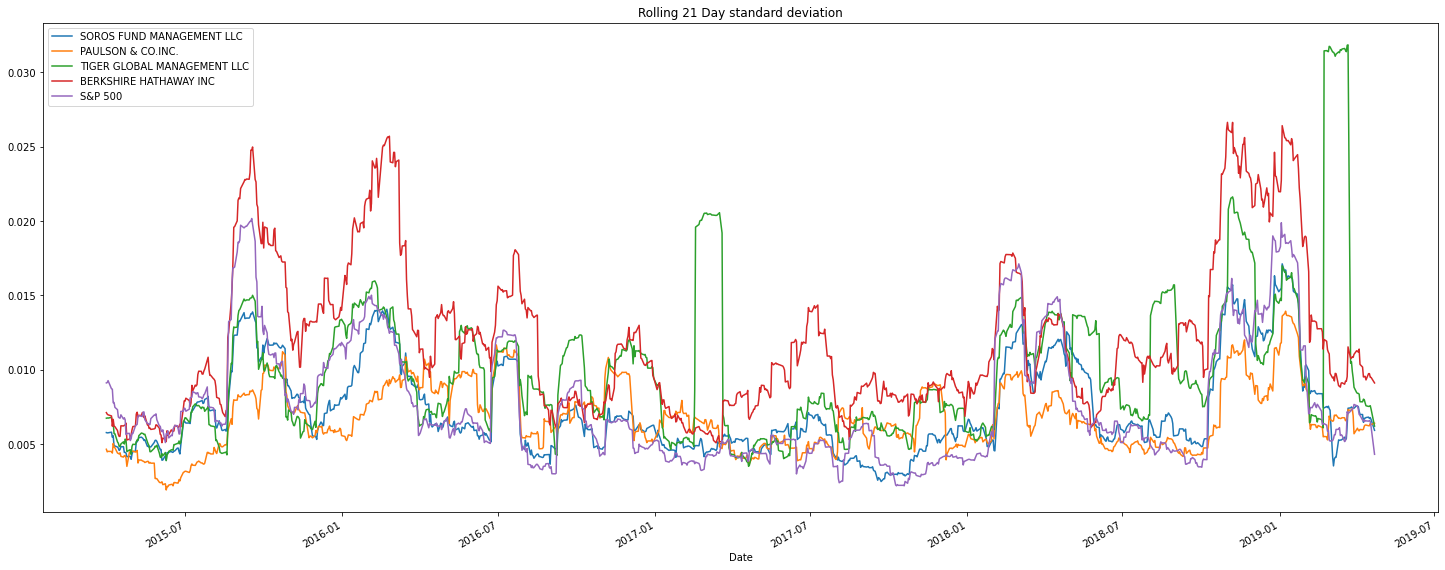

In [72]:
# STD окном на 21 день
combined_df.rolling(window=21).std().plot(figsize=(25,10),title="Rolling 21 Day standard deviation")


<AxesSubplot:>

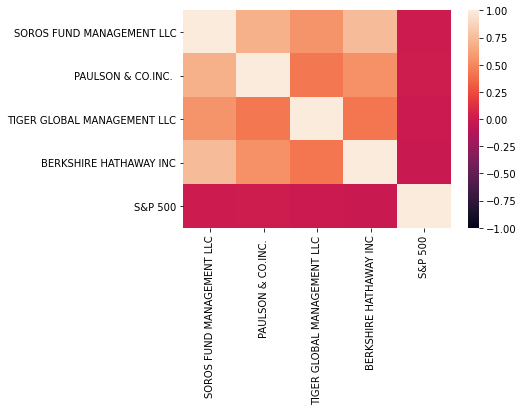

In [73]:
# Корреляции
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

Бета 0.00053


<AxesSubplot:title={'center':'Rolling 21 Day Beta Soros Fund Mgt'}, xlabel='Date'>

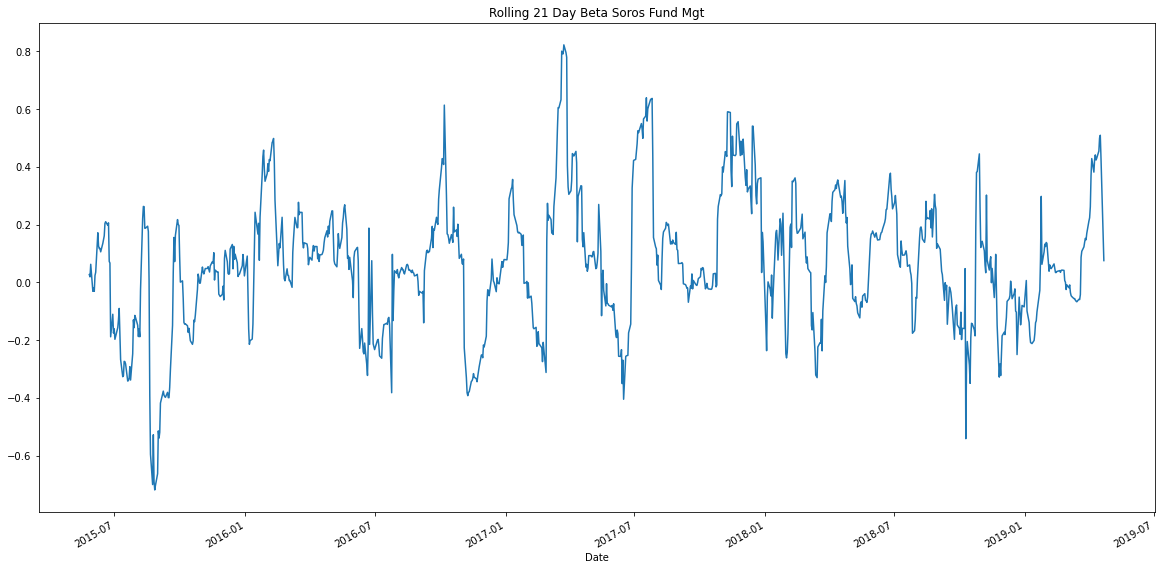

In [74]:
# Расчет Беты и сравним с S&P 500
variance = combined_df['S&P 500'].var()
soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov( combined_df['S&P 500'])
soros_beta=soros_covariance/variance
print("Бета", round(soros_beta,5))

rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
rolling_soros_cov = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(combined_df['S&P 500'])
rolling_soros_beta = rolling_soros_cov / rolling_variance


rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 21 Day Beta Soros Fund Mgt')


---

## Годовой Шарп (или на другой период)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

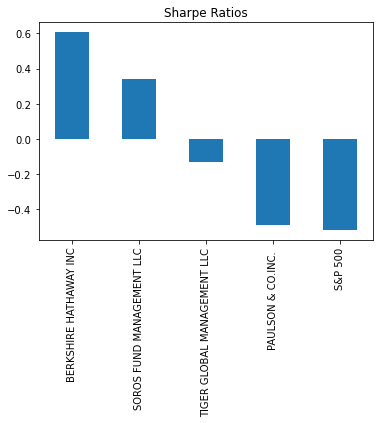

In [75]:
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios. sort_values(ascending=False)
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
w